# CS 3110/5110: Data Privacy
## In-Class Exercise, Week of 9/30/2024

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def laplace_mech_vec(vec, sensitivity, epsilon):
    return [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in vec]

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def gaussian_mech_vec(vec, sensitivity, epsilon, delta):
    return [v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon) for v in vec]

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

## Question 1

Implement the Gaussian mechanism for $(\epsilon, \delta)$-differential privacy.

In [2]:
def gaussian_mech(v, sensitivity, epsilon, delta):
    sigma_squared = 2 * sensitivity**2 * np.log(1.25/delta) / (epsilon**2)
    return v + np.random.normal(loc=0, scale=np.sqrt(sigma_squared))

In [3]:
# TEST CASE

results = [gaussian_mech(len(adult[adult['Age'] > 50]), 1, 1.0, 10e-5) for _ in range(100)]
errors = [pct_error(len(adult[adult['Age'] > 50]), r) for r in results]
print('mean error:', np.mean(errors))

assert np.mean(errors) > 0
assert np.mean(errors) < 2

mean error: 0.05221803018591102


## Question 2

How do the Laplace and Gaussian mechanisms compare in terms of relative error on the query "how many individuals are over 50 years old" with $\epsilon = 1$ and $\delta = 10^{-5}$?

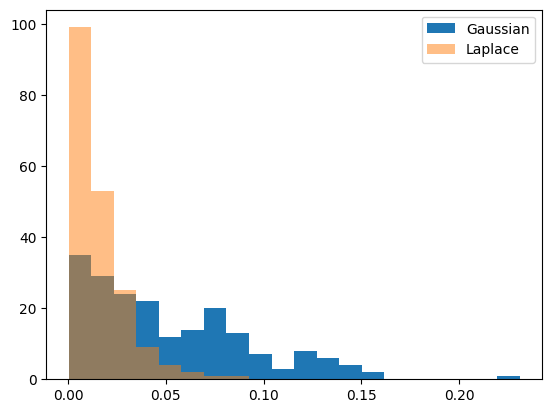

In [4]:
true_answer = len(adult[adult['Age'] > 50])

laplace_answers = [laplace_mech(true_answer, 1, 1) for _ in range(200)]
gaussian_answers = [gaussian_mech(true_answer, 1, 1, 10e-5) for _ in range(200)]

laplace_error = [pct_error(true_answer, a) for a in laplace_answers]
gaussian_error = [pct_error(true_answer, a) for a in gaussian_answers]

_, bins, _ = plt.hist(gaussian_error, bins=20, label='Gaussian')
plt.hist(laplace_error, bins=bins, label='Laplace', alpha=0.5)
plt.legend();

YOUR ANSWER HERE

## Not a Question - Just for reference

[Reference](https://uvm-plaid.github.io/programming-dp/notebooks/ch6.html#the-gaussian-mechanism)

e^epsilon = 2.718281828459045


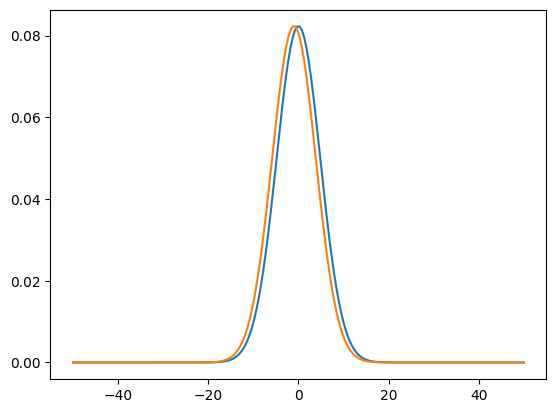

In [5]:
epsilon = 1
sensitivity = 1
delta = 1e-5
sigma_squared = 2 * sensitivity**2 * np.log(1.25 / delta) / (epsilon**2)
sigma = np.sqrt(sigma_squared)

def gauss_pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(1/2)*(x/sigma)**2)

xs = np.linspace(-50, 50, 200)
ys1 = [gauss_pdf(x) for x in xs]
ys2 = [gauss_pdf(x+1) for x in xs]

plt.plot(xs,ys1)
plt.plot(xs,ys2)

# ratio < e^epsilon should hold
print('e^epsilon =', np.exp(epsilon))
ratios = [(x, y1 / y2) for x, y1, y2 in zip(xs, ys1, ys2)]
#ratios

e^epsilon = 2.718281828459045


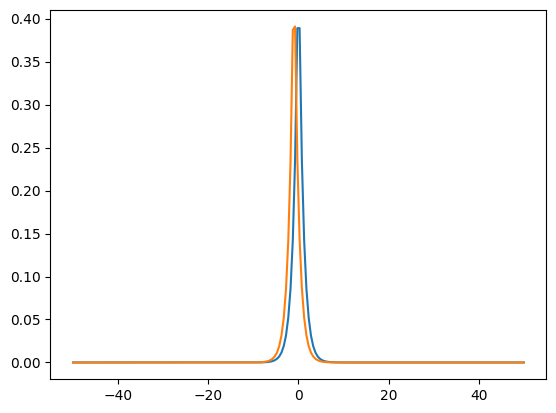

In [6]:
def laplace_pdf(x):
    return (1/2)*epsilon * np.exp(-np.abs(x)*epsilon)

xs = np.linspace(-50, 50, 200)
ys1 = [laplace_pdf(x) for x in xs]
ys2 = [laplace_pdf(x+1) for x in xs]

plt.plot(xs,ys1)
plt.plot(xs,ys2)

# ratio < e^epsilon should hold
print('e^epsilon =', np.exp(epsilon))
ratios = [(x, y1 / y2) for x, y1, y2 in zip(xs, ys1, ys2)]
#ratios

## Question 3

The function `age_cdf` calculates the cumulative distribution function (CDF) of the ages in the adult dataset, expressed as a vector of counts.

What is the **L1 global sensitivity** of `age_cdf`?

Length of CDF vector: 100


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 395,
 945,
 1657,
 2410,
 3130,
 3895,
 4772,
 5570,
 6411,
 7196,
 8031,
 8898,
 9711,
 10572,
 11460,
 12288,
 13163,
 14049,
 14925,
 15823,
 16681,
 17508,
 18324,
 19118,
 19926,
 20706,
 21476,
 22200,
 22934,
 23671,
 24379,
 24922,
 25499,
 26101,
 26696,
 27174,
 27638,
 28053,
 28472,
 28838,
 29196,
 29562,
 29917,
 30229,
 30529,
 30787,
 31017,
 31225,
 31403,
 31553,
 31704,
 31824,
 31932,
 32021,
 32093,
 32160,
 32224,
 32275,
 32320,
 32366,
 32395,
 32418,
 32440,
 32462,
 32482,
 32494,
 32500,
 32510,
 32513,
 32514,
 32515,
 32518,
 32518,
 32561,
 32561,
 32561,
 32561,
 32561,
 32561,
 32561,
 32561,
 32561]

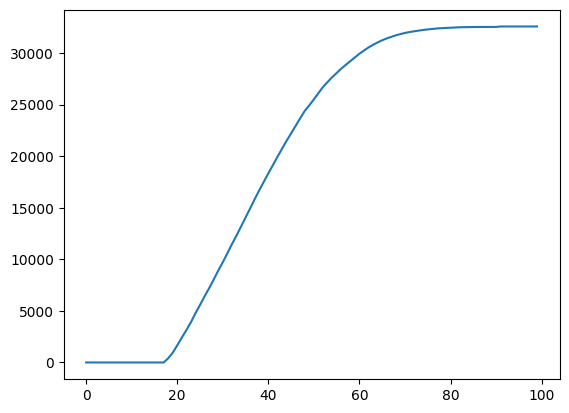

In [7]:
def age_cdf():
    a = adult['Age']
    return [len(a[a < i]) for i in range(100)]

plt.plot(age_cdf());
print('Length of CDF vector:', len(age_cdf()))
age_cdf()

- The L1 global sensitivity is the sum of the individual sensitivities of the elements of the vector.
- For this query, each element is a count, with a sensitivity of 1.
- Therefore, the L1 global sensitivity is 100*1 = 100.
- Note. The L1 global sensitivity has nothing to do with the VALUES in the age_cdf() result. 

## Question 4

What is the **L2 global sensitivity** of `age_cdf`?

In [8]:
element_wise_sens = 1
num_elements = 100
element_wise_vec_sensitivities = [element_wise_sens for _ in range(num_elements)]
l1_sens = np.sum(element_wise_vec_sensitivities)
squared_element_wise_sens = [x**2 for x in element_wise_vec_sensitivities]
l2_sens = np.sqrt(np.sum(squared_element_wise_sens))
print(l1_sens, l2_sens)

100 10.0


- The L2 global sensitivity is the square root of the sum of the squares of the element-wise sensitivities
- Each element of the vector is a count, so it has a sensitivity of 1 and a squared sensitivity of `1*1 = 1`
- Thus the L2 global sensitivity is sqrt(100) = 10
- This is **much less** than the L1 sensitivity of 100

## Question 5

Use the vector-valued Laplace and Gaussian mechanisms to construct noisy versions of the CDF of ages. **Be sure to use the right sensitivity!**

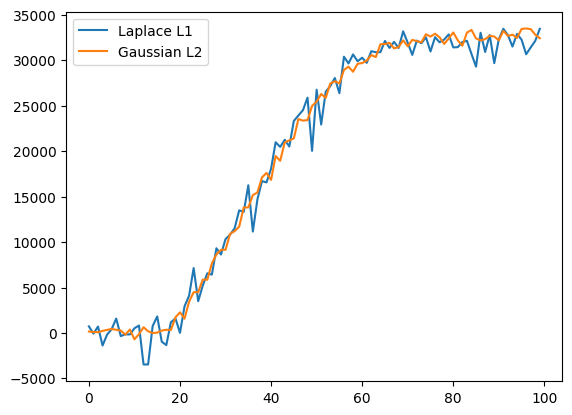

In [15]:
def laplace_cdf(epsilon):
    cdf = age_cdf()
    noisy_cdf = laplace_mech_vec(cdf,
                                 sensitivity=100, # L1 global sensitivity of age_cdf
                                 epsilon=epsilon)
    return noisy_cdf

def gaussian_cdf(epsilon, delta):
    cdf = age_cdf()
    noisy_cdf = gaussian_mech_vec(cdf,
                                  sensitivity=10, # L2 global sensitivity of age_cdf
                                  epsilon=epsilon,
                                  delta=delta)
    return noisy_cdf

plt.plot(laplace_cdf(0.1), label='Laplace L1');
plt.plot(gaussian_cdf(0.1, 1e-5), label='Gaussian L2');
plt.legend();

## Question 6

Use the *regular* (not vector-valued) Laplace mechanism, **with advanced composition**, to construct a noisy CDF of ages.

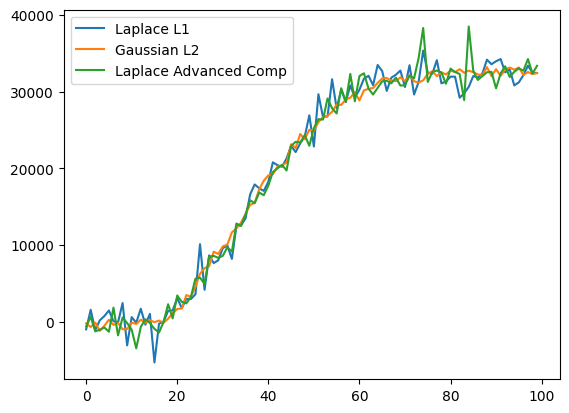

In [16]:
def laplace_cdf_advanced_composition(epsilon, delta):
    cdf = age_cdf()
    k = len(cdf)
    # goal: 2*epsilon_i*np.sqrt(2*k*np.log(1/delta)) = epsilon
    epsilon_i = epsilon/(2*np.sqrt(2*k*np.log(1/delta)))
    noisy_cdf = [laplace_mech(v,
                              sensitivity=1,
                              epsilon=epsilon_i)
                for v in cdf]
    return noisy_cdf
    
plt.plot(laplace_cdf(0.1), label='Laplace L1')
plt.plot(gaussian_cdf(0.1, 1e-5), label='Gaussian L2')
plt.plot(laplace_cdf_advanced_composition(0.1, 1e-5), label='Laplace Advanced Comp')
plt.legend();

## Question 7

Write a function to calculate the L1 **local sensitivity** of the following mean query.

In [ ]:
def mean_query():
    b = 125
    return adult['Age'][adult['Education'] == 'Bachelors'].clip(lower=0, upper=b).mean()

mean_query()

In [ ]:
def mean_query_local_sensitivity():
    # YOUR CODE HERE
    raise NotImplementedError()

mean_query_local_sensitivity()

In [ ]:
# TEST CASE
assert (mean_query_local_sensitivity() - 0.02333831217326363) < 0.0001

## Question 8

Why can't we use the local sensitivity from question 1 directly to achieve differential privacy for `mean_query`?

YOUR ANSWER HERE

## Question 9

Implement an upper bound on $A(f, x, k)$, the local sensitivity of a mean query at distance $k$.

In [ ]:
def ls_mean_at_distance(df, b, k):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE
assert ls_mean_at_distance(adult['Age'], 125, 500) == 0.0038988178784192633
assert ls_mean_at_distance(adult['Age'], 125, 5000) == 0.004535394216465295

## Question 10

Implement an upper bound on $D(f, x, s)$, the distance from $x$ to a database where the local sensitivity of the mean query is greater than or equal to $s$.

In [ ]:
def dist_to_high_ls_mean(df, b, s):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE
assert dist_to_high_ls_mean(adult['Age'], 125, 0.1) == 31311 
assert dist_to_high_ls_mean(adult['Age'], 125, 0.01) == 20061
assert dist_to_high_ls_mean(adult['Age'], 125, 0.001) == 0

## Question 11

Use the Propose-Test-Release (PTR) framework to calculate the mean age in the adult dataset with differential privacy.

In [ ]:
def mean_ptr(epsilon, delta):
    # YOUR CODE HERE
    raise NotImplementedError()

mean_ptr(1.0, 10e-5)

In [ ]:
# TEST CASE

true_answer = adult['Age'].mean()
trials = [mean_ptr(1.0, 10e-5) for _ in range(20)]
errors = [pct_error(true_answer, x) for x in trials]
assert np.mean(errors) < 1.0

## Exploration: how low can the proposal be?

In [ ]:
xs = np.linspace(0.001, 0.01)
clipped_ages = adult['Age'].clip(lower=0, upper=125)
ys = [dist_to_high_ls_mean(clipped_ages, 125, p) for p in xs]

In [ ]:
plt.plot(xs, ys)